<a id="top"></a>
# Erstellung von cf-kompatiblen netcdf-Daten mit R

***

## Lernziele

Am Ende dieses Tutorials werden die Lernenden in der Lage sein:
- binäre Daten in R einzulesen
- das netcdf Datenformat inklusive des Metadatenstandards "Climate and Forecast (CF)" zu erklären
- netcdf Dateien in R zu schreiben

Als Beispieldatensatz werden Niederschlagsdaten der DWD Radarklimatologie genutzt.

## Einleitung

Die Radarklimatologie des Deutschen Wetterdienstes beinhaltet Niederschlagsmessungen basierend auf Radardaten, welche an Stationsmessungen angeeicht wurden. Sie bietet einen kontinuierliche Erfassung von Niederschlägen in Raum und Zeit mit einer räumlichen Auflösung von 1 km * 1 km und einer zeitlichen Auflösung von 1 h (RW-Produkt) bzw. 5 min (YW-Produkt). Der Zugang zu den Daten sowie weitere Informationen ist hier zu finden DOI:_10.5676/DWD/RADKLIM_RW_V2017.002_

Die Daten liegen in einem Binärformat vor und werden in diesem Tutorial in das netcdf-Format umgewandelt. 


## Packages
Die folgenden R-packages werden benötigt:
- ncdf4
- chron

In [2]:
#install.packages("ncdf4")
#install.packages("chron")
#install.packages("fields")

## 1. Daten herunterladen

Wir beginnen mit dem Herunterladen der Binärdaten vom opendata-Server des Deutschen Wetterdienstes. 

In [4]:
system("mkdir ./data")
system("wget https://opendata.dwd.de/climate_environment/CDC/grids_germany/hourly/radolan/reproc/2017_002/bin/2001/RW2017.002_200101.tar.gz", intern=TRUE)

character(0)

## 2. Dateien entpacken

Die Daten sind abgespeichert als monatliche tar-archive. Durch das Entpacken werden stündliche Dateien mit den Namen raa01-rw2017.002_10000-************-dwd---bin gespeichert, wobei '*' als Platzhalter für das Datum dient. 

In [12]:
system("tar -xvf RW2017.002_200101.tar.gz -C data", intern=TRUE)

[1] "raa01-rw2017.002_10000-0101312250-dwd---bin"
  [2] "raa01-rw2017.002_10000-0101312350-dwd---bin"
  [3] "raa01-rw2017.002_10000-0101312150-dwd---bin"
  [4] "raa01-rw2017.002_10000-0101312050-dwd---bin"
  [5] "raa01-rw2017.002_10000-0101311950-dwd---bin"
  [6] "raa01-rw2017.002_10000-0101311850-dwd---bin"
  [7] "raa01-rw2017.002_10000-0101311750-dwd---bin"
  [8] "raa01-rw2017.002_10000-0101311650-dwd---bin"
  [9] "raa01-rw2017.002_10000-0101311550-dwd---bin"
 [10] "raa01-rw2017.002_10000-0101311450-dwd---bin"
 [11] "raa01-rw2017.002_10000-0101311350-dwd---bin"
 [12] "raa01-rw2017.002_10000-0101311250-dwd---bin"
 [13] "raa01-rw2017.002_10000-0101311150-dwd---bin"
 [14] "raa01-rw2017.002_10000-0101311050-dwd---bin"
 [15] "raa01-rw2017.002_10000-0101310950-dwd---bin"
 [16] "raa01-rw2017.002_10000-0101310750-dwd---bin"
 [17] "raa01-rw2017.002_10000-0101310850-dwd---bin"
 [18] "raa01-rw2017.002_10000-0101310450-dwd---bin"
 [19] "raa01-rw2017.002_10000-0101310650-dwd---bin"
 [20] "raa01-rw2017.002_10000-0101310550-dwd---bin"
 [21] "raa01-rw2017.002_10000-0101310350-dwd---bin"
 [22] "raa01-rw2017.002_10000-0101310250-dwd---bin"
 [23] "raa01-rw2017.002_10000-0101310150-dwd---bin"
 [24] "raa01-rw2017.002_10000-0101310050-dwd---bin"
 [25] "raa01-rw2017.002_10000-0101302350-dwd---bin"
 [26] "raa01-rw2017.002_10000-0101302250-dwd---bin"
 [27] "raa01-rw2017.002_10000-0101302150-dwd---bin"
 [28] "raa01-rw2017.002_10000-0101302050-dwd---bin"
 [29] "raa01-rw2017.002_10000-0101301950-dwd---bin"
 [30] "raa01-rw2017.002_10000-0101301850-dwd---bin"
 [31] "raa01-rw2017.002_10000-0101301750-dwd---bin"
 [32] "raa01-rw2017.002_10000-0101301450-dwd---bin"
 [33] "raa01-rw2017.002_10000-0101301550-dwd---bin"
 [34] "raa01-rw2017.002_10000-0101301350-dwd---bin"
 [35] "raa01-rw2017.002_10000-0101301650-dwd---bin"
 [36] "raa01-rw2017.002_10000-0101301150-dwd---bin"
 [37] "raa01-rw2017.002_10000-0101301250-dwd---bin"
 [38] "raa01-rw2017.002_10000-0101300950-dwd---bin"
 [39] "raa01-rw2017.002_10000-0101301050-dwd---bin"
 [40] "raa01-rw2017.002_10000-0101300850-dwd---bin"
 [41] "raa01-rw2017.002_10000-0101300750-dwd---bin"
 [42] "raa01-rw2017.002_10000-0101300650-dwd---bin"
 [43] "raa01-rw2017.002_10000-0101300450-dwd---bin"
 [44] "raa01-rw2017.002_10000-0101300250-dwd---bin"
 [45] "raa01-rw2017.002_10000-0101300350-dwd---bin"
 [46] "raa01-rw2017.002_10000-0101300150-dwd---bin"
 [47] "raa01-rw2017.002_10000-0101300550-dwd---bin"
 [48] "raa01-rw2017.002_10000-0101300050-dwd---bin"
 [49] "raa01-rw2017.002_10000-0101292350-dwd---bin"
 [50] "raa01-rw2017.002_10000-0101292250-dwd---bin"
 [51] "raa01-rw2017.002_10000-0101292050-dwd---bin"
 [52] "raa01-rw2017.002_10000-0101292150-dwd---bin"
 [53] "raa01-rw2017.002_10000-0101291850-dwd---bin"
 [54] "raa01-rw2017.002_10000-0101291950-dwd---bin"
 [55] "raa01-rw2017.002_10000-0101291750-dwd---bin"
 [56] "raa01-rw2017.002_10000-0101291650-dwd---bin"
 [57] "raa01-rw2017.002_10000-0101291550-dwd---bin"
 [58] "raa01-rw2017.002_10000-0101291450-dwd---bin"
 [59] "raa01-rw2017.002_10000-0101291350-dwd---bin"
 [60] "raa01-rw2017.002_10000-0101291250-dwd---bin"
 [61] "raa01-rw2017.002_10000-0101291150-dwd---bin"
 [62] "raa01-rw2017.002_10000-0101291050-dwd---bin"
 [63] "raa01-rw2017.002_10000-0101290850-dwd---bin"
 [64] "raa01-rw2017.002_10000-0101290750-dwd---bin"
 [65] "raa01-rw2017.002_10000-0101290650-dwd---bin"
 [66] "raa01-rw2017.002_10000-0101290550-dwd---bin"
 [67] "raa01-rw2017.002_10000-0101290450-dwd---bin"
 [68] "raa01-rw2017.002_10000-0101290350-dwd---bin"
 [69] "raa01-rw2017.002_10000-0101290950-dwd---bin"
 [70] "raa01-rw2017.002_10000-0101290250-dwd---bin"
 [71] "raa01-rw2017.002_10000-0101290150-dwd---bin"
 [72] "raa01-rw2017.002_10000-0101290050-dwd---bin"
 [73] "raa01-rw2017.002_10000-0101282350-dwd---bin"
 [74] "raa01-rw2017.002_10000-0101282250-dwd---bin"
 [75] "raa01-rw2017.002_10000-0101282150-dwd---bin"
 [76] "raa01-rw2017.002_10000-0101282050-dwd---bin"
 [77] "raa01-rw2017.002_10000-0101281950-dwd---bin

## 3. Daten einlesen

Die Daten sind im sogenannten RADKLIM-Kompositformat abgespeichert, das heißt jede Datei besteht aus einem ASCII-Teil, welcher Metadaten enthält und einem Binär-Teil, welcher die eigentlichen Daten enthält. Das Kompositformat wird detailliert im folgenden Dokument beschrieben: https://www.dwd.de/DE/leistungen/radarklimatologie/radklim_kompositformat_1_0.pdf

### 3.1. ASCII-Teil

Aus dem ASCII-Teil der Datei `raa01-rw2017.002_10000-0101010050-dwd---bin` wurden die Metadaten ausgelesen und in der Variable `header` gespeichert. 

In [6]:
library(ncdf4)
library(chron)
library(fields)

filelist_name_only<-dir("./data",pattern="raa01-rw2017")
filelist_full_path<-normalizePath(dir("./data",pattern="raa01-rw2017",full.names = T))

In [7]:
nfiles<-length(filelist_name_only)
radarmatrix<-array(data=0,dim=c(1100,900,nfiles))
time_vector<-vector(mode="double",length=nfiles)

#Loop over 24 files (equal to 1 day)

for(i in 1:nfiles){
    year<-substr(as.character(filelist_name_only[i]),24,25)
    month<-substr(as.character(filelist_name_only[i]),26,27)
    day<-substr(as.character(filelist_name_only[i]),28,29)
    hour<-substr(as.character(filelist_name_only[i]),30,31)
    minute<-substr(as.character(filelist_name_only[i]),32,33)
    
    time_vector[i]=chron(dates(c(paste(month,"/",day,"/20",year,sep=""))),times=times(c(paste(hour,":",minute,":00"))),origin=c(01,01,1900))
    con=file(filelist_full_path[i],"rb")
    
    header1<-readChar(con,92)
    length_of_stations_in_header<-as.numeric(readChar(con,2))
    stations<-readChar(con,length_of_stations_in_header)
    ext<-readChar(con,1)
    x<-readBin(con,"integer",n=990000,size=2,signed=F,endian="little")
    close(con)
    temp<-matrix(x,ncol=(900),nrow=1100,byrow=T)
    temp[(which(temp==10692))]<-NA
    radarmatrix[,,i]<-temp
}

radarmatrix[which(radarmatrix>1000)]<-NA
radarmatrix<-radarmatrix/10;



[1] "i ist  1"
[1] "i ist  2"
[1] "i ist  3"
[1] "i ist  4"
[1] "i ist  5"
[1] "i ist  6"
[1] "i ist  7"
[1] "i ist  8"
[1] "i ist  9"
[1] "i ist  10"
[1] "i ist  11"
[1] "i ist  12"
[1] "i ist  13"
[1] "i ist  14"
[1] "i ist  15"
[1] "i ist  16"
[1] "i ist  17"
[1] "i ist  18"
[1] "i ist  19"
[1] "i ist  20"
[1] "i ist  21"
[1] "i ist  22"
[1] "i ist  23"
[1] "i ist  24"
[1] "i ist  25"
[1] "i ist  26"
[1] "i ist  27"
[1] "i ist  28"
[1] "i ist  29"
[1] "i ist  30"
[1] "i ist  31"
[1] "i ist  32"
[1] "i ist  33"
[1] "i ist  34"
[1] "i ist  35"
[1] "i ist  36"
[1] "i ist  37"
[1] "i ist  38"
[1] "i ist  39"
[1] "i ist  40"
[1] "i ist  41"
[1] "i ist  42"
[1] "i ist  43"
[1] "i ist  44"
[1] "i ist  45"
[1] "i ist  46"
[1] "i ist  47"
[1] "i ist  48"
[1] "i ist  49"
[1] "i ist  50"
[1] "i ist  51"
[1] "i ist  52"
[1] "i ist  53"
[1] "i ist  54"
[1] "i ist  55"
[1] "i ist  56"
[1] "i ist  57"
[1] "i ist  58"
[1] "i ist  59"
[1] "i ist  60"
[1] "i ist  61"
[1] "i ist  62"
[1] "i ist  63"
[

## 4. Daten verarbeiten

In diesem Abschnitt wird die eben gespeicherte Matrix `radarmatrix` als netcdf Datei gespeichert. Hierzu müssen die Gitterkoordinaten berechnet werden. 

In [8]:
x<-ncdim_def("x",create_dimvar=F,"",1:900)
y<-ncdim_def("y",create_dimvar=F,"",1:1100)

timedim<-ncdim_def("time","days since 1900-01-01 00:00:00.0 -0:00",time_vector)

fillvalue<-1e32
dlname <- "precipitation_amount"
prec_def <- ncvar_def("prec","kg m-2",list(x,y,timedim),fillvalue,dlname,prec="single")

# create netCDF file and put arrays
ncfname <- paste("prec_rw_",year,month,".nc",sep="")
#ncfname <- paste("/gpfs/ahrenshsmfs02/share/data/Radardata/3reanalyse/netcdf/RWrea/prec_rw_",year_list[j],month_list[k],".nc",sep="")
ncout <- nc_create(ncfname,prec_def,force_v4=T)

# put variables
#ncvar_put(ncout,lon_def,lon)
#ncvar_put(ncout,lat_def,lat)
ncvar_put(ncout,prec_def,aperm(radarmatrix,c(2,1,3)))

# put additional attributes into dimension and data variables
#ncatt_put(ncout,"lon","axis","X") #,verbose=FALSE) #,definemode=FALSE)
#ncatt_put(ncout,"lat","axis","Y")
ncatt_put(ncout,"time","axis","T")

# add global attributes
ncatt_put(ncout,0,"title","Radar-based Precipitation Climatology for Germany")
ncatt_put(ncout,0,"institution","Deutscher Wetterdienst (DWD)")
ncatt_put(ncout,0,"source","Radar composit, Gauge-adjusted")
ncatt_put(ncout,0,"references","http://dx.doi.org/10.5676/DWD/RADKLIM_RW_V2017.002")
ncatt_put(ncout,0,"history","transformation to netcdf with procedure by Christopher Purr (University of Hamburg) 2023/01/01")
ncatt_put(ncout,0,"Conventions","CF-1.8")

# close the file, writing data to disk
nc_close(ncout)

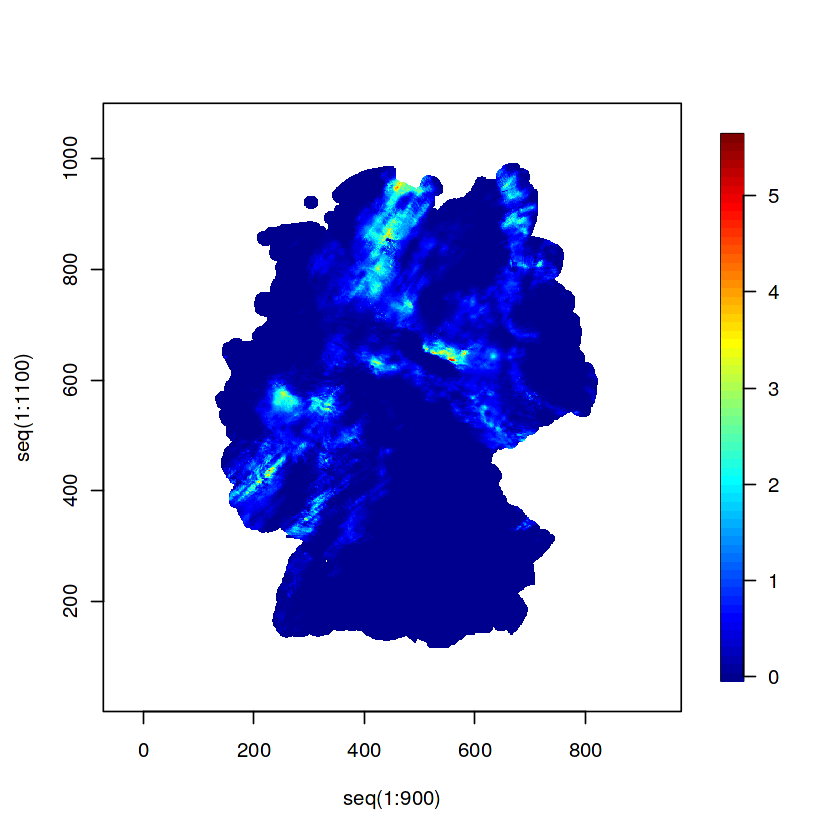

In [9]:
image.plot(seq(1:900),seq(1:1100),t(radarmatrix[,,20]),asp=1)

## Überprüfung der netcdf-Datei auf Konformität mit dem cf-Standard

Um zu überprüfen, ob die erstellte netcdf-Datei konform zum CF-Standard ist, kann der sogenannte "CF-Checker" benutzt werden: https://github.com/cedadev/cf-checker

Dieser lässt sich beispielsweise mit dem Paketmanager conda wie folgt intallieren:

```
conda create -n cfchecker -c conda-forge cfchecker # create new env OR
conda install cfchecker -c conda-forge             # install on existing env
```

Anschließend kann er wie folgt ausgeführt werden:

In [10]:
system("cfchecks prec_rw_0101.nc")

## Weitere Materialien

- https://unidata.github.io/python-training/workshop/CF%20Conventions/netcdf-and-cf-the-basics/
- CF-Conventions - Übersicht: https://cfconventions.org/
- CF-Conventions - aktuelle Version: http://cfconventions.org/cf-conventions/cf-conventions.html